<a href="https://colab.research.google.com/github/thattesv5/ProgrammingAssignment2-Lexical-Scoping/blob/master/Copy_of_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [2]:
''' DATA NO Longer Found Here'''
# Import Data 
  # File link for plot 2(a):
  # https://drive.google.com/file/d/1oe-3LEaqlQwA_e3zcgyNDBJJNcvpQTxc/view?usp=sharing
  # File link for plot 2(b):
  # https://drive.google.com/file/d/1NoxWqRXEIkk8RlHnZGSH2I7P0LF9_waa/view?usp=sharing
  # File link for plot 5(a):
  # https://drive.google.com/file/d/1XLmjxVMwTy6DwnGhrk-ST6JaGkoKEprZ/view?usp=sharing
  # File link for plot 5(b):
  # https://drive.google.com/file/d/1WJ-30gVs7AWKTT6SJxBNnF5BW3isJRDk/view?usp=sharing
lnk_2_a = "https://drive.google.com/uc?export=download&id=1oe-3LEaqlQwA_e3zcgyNDBJJNcvpQTxc"
lnk_2_b = "https://drive.google.com/uc?export=download&id=1NoxWqRXEIkk8RlHnZGSH2I7P0LF9_waa"

lnk_5_a = "https://drive.google.com/uc?export=download&id=1XLmjxVMwTy6DwnGhrk-ST6JaGkoKEprZ"
lnk_5_b = "https://drive.google.com/uc?export=download&id=1WJ-30gVs7AWKTT6SJxBNnF5BW3isJRDk"

In [3]:
lnk_16_b_hr = "https://drive.google.com/uc?export=download&id=1i2MCKcEkN1QEgiF-9zqljzKx2jIbeV_U"
lnk_16_a_hr = "https://drive.google.com/uc?export=download&id=1EDGmENcfGP6YEwY11BCRGc7HnQl5isld"
lnk_11_b_hr = "https://drive.google.com/uc?export=download&id=1SjD064dySTIp9EKDxVP_0daJwloWBbXj"
lnk_11_a_hr = "https://drive.google.com/uc?export=download&id=12hWw3SaFWAr7sZmpRVH9AifGuDDmM1ki"
lnk_5_b_hr = "https://drive.google.com/uc?export=download&id=1eYmYrXuqJQNhQn7z74aY00DUbmn28qIR"
lnk_5_a_hr = "https://drive.google.com/uc?export=download&id=1oMFPqqt_cAB7-NXpCG44y0EYCzXSXiSB"
lnk_2_b_hr = "https://drive.google.com/uc?export=download&id=1dPJ3ZTKO__1Qgr-Dv9k5vIOVcTtLXd9z"
lnk_2_a_hr = "https://drive.google.com/uc?export=download&id=10__Q38hQSOeUBrvO8TIdTVp6rnVEAIDB"

In [4]:
def import_data(lnk):
  df = pd.read_csv(lnk,parse_dates = ["local_device_time"])
  return df

In [5]:
hr_2_a = pd.read_csv(lnk_2_a_hr,parse_dates = ["local_device_time"], usecols=['local_device_time','tbelow','air_temp'])
hr_2_b = pd.read_csv(lnk_2_b_hr,parse_dates = ["local_device_time"], usecols=['local_device_time','tbelow','air_temp'])

In [6]:
hr_16_a = pd.read_csv(lnk_16_a_hr,parse_dates = ["local_device_time"], usecols=['local_device_time','tbelow','air_temp'])
hr_16_b = pd.read_csv(lnk_16_b_hr,parse_dates = ["local_device_time"], usecols=['local_device_time','tbelow','air_temp'])

In [7]:
print(hr_16_a)
print(hr_16_b)

       local_device_time  air_temp  tbelow
0    2020-05-11 00:00:00       NaN     NaN
1    2020-05-11 01:00:00       NaN     NaN
2    2020-05-11 02:00:00       NaN     NaN
3    2020-05-11 03:00:00       NaN     NaN
4    2020-05-11 04:00:00       NaN     NaN
...                  ...       ...     ...
4412 2020-11-10 19:00:00       NaN     NaN
4413 2020-11-10 20:00:00       NaN     NaN
4414 2020-11-10 21:00:00       NaN     NaN
4415 2020-11-10 22:00:00       NaN     NaN
4416 2020-11-10 23:00:00       NaN     NaN

[4417 rows x 3 columns]
       local_device_time  air_temp  tbelow
0    2020-06-12 00:00:00       NaN     NaN
1    2020-06-12 01:00:00       NaN     NaN
2    2020-06-12 02:00:00       NaN     NaN
3    2020-06-12 03:00:00       NaN     NaN
4    2020-06-12 04:00:00       NaN     NaN
...                  ...       ...     ...
3668 2020-11-11 19:00:00       NaN     NaN
3669 2020-11-11 20:00:00       NaN     NaN
3670 2020-11-11 21:00:00       NaN     NaN
3671 2020-11-11 22:00:00     

In [8]:
hr_16_a['hour'] = hr_16_a['local_device_time'].dt.time
hr_16_a['local_device_time'] = hr_16_a['local_device_time'].dt.date
hr_16_b['hour'] = hr_16_b['local_device_time'].dt.time
hr_16_b['local_device_time'] = hr_16_b['local_device_time'].dt.date
hour_mask_a = hr_16_a['hour'] == pd.to_datetime('12:00:00').time()
hr_16_a = hr_16_a[hour_mask_a]
#hr_16_a = hr_16_a.reset_index(drop=True)
hour_mask_b = hr_16_b['hour'] == pd.to_datetime('12:00:00').time()
hr_16_b = hr_16_b[hour_mask_a]
#hr_16_b = hr_16_b.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [9]:
hr_16_a.set_index('local_device_time', inplace=True)
hr_16_b.set_index('local_device_time', inplace=True)

In [10]:
sub_16_a = hr_16_a.index < pd.to_datetime('2020/08/01')
sub_16_a = hr_16_a[sub_16_a]
mask = sub_16_a.index > pd.to_datetime('2020/07/20')
sub_16_a = sub_16_a[mask]

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [11]:
sub_16_a

,air_temp,tbelow,hour
local_device_time,,,
2020-07-21,79.0,62.0,12:00:00
2020-07-22,80.0,67.0,12:00:00
2020-07-23,84.0,73.0,12:00:00
2020-07-24,83.0,69.0,12:00:00
2020-07-25,86.0,72.0,12:00:00
2020-07-26,73.0,33170.0,12:00:00
2020-07-27,76.0,33143.0,12:00:00
2020-07-28,80.0,33146.0,12:00:00
2020-07-29,84.0,11090.0,12:00:00


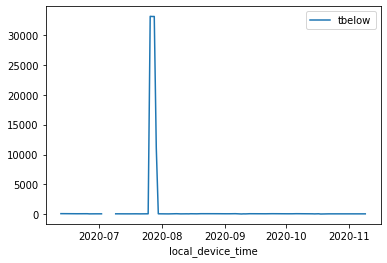

In [12]:
hr_16_a.plot(y='tbelow')

In [13]:
print(hr_2_a.isna().sum())
print(hr_2_b.isna().sum())

local_device_time      0
air_temp             787
tbelow               787
dtype: int64
local_device_time     0
air_temp             33
tbelow               33
dtype: int64


In [14]:
hr_2 = pd.merge(hr_2_a, hr_2_b, how='inner', on='local_device_time')

In [15]:
print(hr_2)

       local_device_time  air_temp_x  tbelow_x  air_temp_y  tbelow_y
0    2020-06-12 00:00:00         NaN       NaN         NaN       NaN
1    2020-06-12 01:00:00         NaN       NaN         NaN       NaN
2    2020-06-12 02:00:00         NaN       NaN         NaN       NaN
3    2020-06-12 03:00:00         NaN       NaN         NaN       NaN
4    2020-06-12 04:00:00         NaN       NaN         NaN       NaN
...                  ...         ...       ...         ...       ...
1075 2020-07-26 19:00:00        75.0      76.0         NaN       NaN
1076 2020-07-26 20:00:00        75.0      76.0         NaN       NaN
1077 2020-07-26 21:00:00        74.0      74.0         NaN       NaN
1078 2020-07-26 22:00:00        72.0      73.0         NaN       NaN
1079 2020-07-26 23:00:00        71.0      72.0         NaN       NaN

[1080 rows x 5 columns]


In [16]:
hr_2['tbelow'] = hr_2[['tbelow_x','tbelow_y']].mean(axis=1)
hr_2 = hr_2.drop(['tbelow_x','tbelow_y'], axis=1)
hr_2['air_temp'] = hr_2[['air_temp_x','air_temp_y']].mean(axis=1)
hr_2 = hr_2.drop(['air_temp_x','air_temp_y'], axis=1)

In [17]:
print(hr_2)

       local_device_time  tbelow  air_temp
0    2020-06-12 00:00:00     NaN       NaN
1    2020-06-12 01:00:00     NaN       NaN
2    2020-06-12 02:00:00     NaN       NaN
3    2020-06-12 03:00:00     NaN       NaN
4    2020-06-12 04:00:00     NaN       NaN
...                  ...     ...       ...
1075 2020-07-26 19:00:00    76.0      75.0
1076 2020-07-26 20:00:00    76.0      75.0
1077 2020-07-26 21:00:00    74.0      74.0
1078 2020-07-26 22:00:00    73.0      72.0
1079 2020-07-26 23:00:00    72.0      71.0

[1080 rows x 3 columns]


In [18]:
print(hr_2_a.dtypes)

local_device_time    datetime64[ns]
air_temp                    float64
tbelow                      float64
dtype: object


In [19]:
hr_2['hour'] = hr_2['local_device_time'].dt.time
hr_2['local_device_time'] = hr_2['local_device_time'].dt.date



In [20]:
print(hr_2)

     local_device_time  tbelow  air_temp      hour
0           2020-06-12     NaN       NaN  00:00:00
1           2020-06-12     NaN       NaN  01:00:00
2           2020-06-12     NaN       NaN  02:00:00
3           2020-06-12     NaN       NaN  03:00:00
4           2020-06-12     NaN       NaN  04:00:00
...                ...     ...       ...       ...
1075        2020-07-26    76.0      75.0  19:00:00
1076        2020-07-26    76.0      75.0  20:00:00
1077        2020-07-26    74.0      74.0  21:00:00
1078        2020-07-26    73.0      72.0  22:00:00
1079        2020-07-26    72.0      71.0  23:00:00

[1080 rows x 4 columns]


In [21]:
pd.to_datetime('12:00:00').time()

datetime.time(12, 0)

In [22]:
print(hr_2_a)

       local_device_time  air_temp  tbelow
0    2020-05-11 00:00:00       NaN     NaN
1    2020-05-11 01:00:00       NaN     NaN
2    2020-05-11 02:00:00       NaN     NaN
3    2020-05-11 03:00:00       NaN     NaN
4    2020-05-11 04:00:00       NaN     NaN
...                  ...       ...     ...
4412 2020-11-10 19:00:00       NaN     NaN
4413 2020-11-10 20:00:00       NaN     NaN
4414 2020-11-10 21:00:00       NaN     NaN
4415 2020-11-10 22:00:00       NaN     NaN
4416 2020-11-10 23:00:00       NaN     NaN

[4417 rows x 3 columns]


In [23]:
hour_mask = hr_2['hour'] == pd.to_datetime('12:00:00').time()
hr_2 = hr_2[hour_mask]
hr_2 = hr_2.reset_index(drop=True)


In [24]:
print(hr_2)

   local_device_time  tbelow  air_temp      hour
0         2020-06-12   103.0      84.0  12:00:00
1         2020-06-13    97.5      80.5  12:00:00
2         2020-06-14    98.5      86.5  12:00:00
3         2020-06-15    94.5      81.5  12:00:00
4         2020-06-16    96.0      84.5  12:00:00
5         2020-06-17    94.5      85.0  12:00:00
6         2020-06-18    70.0      66.5  12:00:00
7         2020-06-19    72.0      68.0  12:00:00
8         2020-06-20    84.0      73.0  12:00:00
9         2020-06-21    89.0      78.0  12:00:00
10        2020-06-22    83.5      77.5  12:00:00
11        2020-06-23    83.0      77.5  12:00:00
12        2020-06-24    85.5      79.0  12:00:00
13        2020-06-25    87.0      83.5  12:00:00
14        2020-06-26    73.0      78.5  12:00:00
15        2020-06-27    77.0      82.0  12:00:00
16        2020-06-28    77.5      83.0  12:00:00
17        2020-06-29    66.5      82.0  12:00:00
18        2020-06-30    62.0      79.0  12:00:00
19        2020-07-01

In [25]:
print(hr_2_a)
print(hr_2_a.index)

       local_device_time  air_temp  tbelow
0    2020-05-11 00:00:00       NaN     NaN
1    2020-05-11 01:00:00       NaN     NaN
2    2020-05-11 02:00:00       NaN     NaN
3    2020-05-11 03:00:00       NaN     NaN
4    2020-05-11 04:00:00       NaN     NaN
...                  ...       ...     ...
4412 2020-11-10 19:00:00       NaN     NaN
4413 2020-11-10 20:00:00       NaN     NaN
4414 2020-11-10 21:00:00       NaN     NaN
4415 2020-11-10 22:00:00       NaN     NaN
4416 2020-11-10 23:00:00       NaN     NaN

[4417 rows x 3 columns]
RangeIndex(start=0, stop=4417, step=1)


In [26]:
def load_tbelow(hr_lnk):
  hr_df = pd.read_csv(hr_lnk, parse_dates = ["local_device_time"], usecols=['local_device_time','tbelow'])
  hr_df['hour'] = hr_df['local_device_time'].dt.time
  hr_df['local_device_time'] = hr_df['local_device_time'].dt.date 
  hour_mask = hr_df['hour'] == pd.to_datetime('12:00:00').time()
  hr_df = hr_df[hour_mask]
  hr_df['local_device_time'] = pd.to_datetime(hr_df['local_device_time'])
  return hr_df.drop('hour',axis=1)

In [27]:
# Import Data
  # File link for plot 11(a):
  # https://drive.google.com/file/d/1uKiwPGX4PkjtVTUhMJk1gzg4H_wb2KPy/view?usp=sharing
  # File link for plot 11(b):
  # https://drive.google.com/file/d/1Aq55aVEWnqLDfILi7s-GP8i6ujU3_Qhd/view?usp=sharing

  # File link for plot 16(a):
  # https://drive.google.com/file/d/18aY3sJTe7mz81ddyjX_o8h_k6zI6ENRX/view?usp=sharing
  # File link for plot 16(b):
  # https://drive.google.com/file/d/1m0hbNC25D42c5TjKVE6EenFXjaDtrzRO/view?usp=sharing

plot_11_a = pd.read_csv("https://drive.google.com/uc?export=download&id=1uKiwPGX4PkjtVTUhMJk1gzg4H_wb2KPy",
                        parse_dates = ["local_device_time","max_temp_time","min_temp_time"])
plot_11_b = pd.read_csv("https://drive.google.com/uc?export=download&id=1m0hbNC25D42c5TjKVE6EenFXjaDtrzRO",
                        parse_dates = ["local_device_time","max_temp_time","min_temp_time"])

plot_16_a = pd.read_csv("https://drive.google.com/uc?export=download&id=18aY3sJTe7mz81ddyjX_o8h_k6zI6ENRX",
                        parse_dates = ["local_device_time","max_temp_time","min_temp_time"])
plot_16_b = pd.read_csv("https://drive.google.com/uc?export=download&id=1m0hbNC25D42c5TjKVE6EenFXjaDtrzRO",
                        parse_dates = ["local_device_time","max_temp_time","min_temp_time"])



HTTPError: ignored

In [ ]:
print(plot_16_a)

In [ ]:
#plot_16_a_t = load_tbelow(lnk_16_a_hr)


In [ ]:
print(plot_16_a_t.dtypes)

In [ ]:
plot_16_a.merge(hr_16_a, how='left')

In [ ]:
plot_16_a.head(20)

In [ ]:
  # irrigation file link: 
  # https://drive.google.com/file/d/1UWClsVao268yHNcX4HJUrK6IK1gOOoPr/view?usp=sharing

irrigation = pd.read_csv("https://drive.google.com/uc?export=download&id=1UWClsVao268yHNcX4HJUrK6IK1gOOoPr",
                         parse_dates = ["Day 1"])

#print(irrigation.head())

In [ ]:
irrigation.head()

In [ ]:
  # nitrogen file link:
  # https://drive.google.com/file/d/1ObrxpIAGni1n5veQR7XUOdtR5l3Zpff3/view?usp=sharing
  

nitrogen = pd.read_csv("https://drive.google.com/uc?export=download&id=1ObrxpIAGni1n5veQR7XUOdtR5l3Zpff3",header=None)

# reformat df for further processing
cols = list(nitrogen[0].values)
#print(nitrogen)
nitrogen = np.transpose(nitrogen)
#print( nitrogen)
nitrogen.columns = cols
nitrogen = nitrogen.drop([0,7],axis=0)
nitrogen["date"] = pd.to_datetime(nitrogen["Farm ID"])

In [ ]:
nitrogen.head()

In [ ]:
# Data Cleaning

# Subset so all data is for same date range
#constrain data sets to match 11a (location with the smallest range of data)
dates = plot_11_a["local_device_time"].values
# mask to dates before 10-30 (harvest)
harvest = pd.to_datetime("10/31/2020")
harvest_mask = dates <= harvest
dates = dates[harvest_mask]


#is date t or f in dates
mask_11_a = plot_11_a["local_device_time"].isin(dates)
mask_11_b = plot_11_b["local_device_time"].isin(dates)
mask_16_a = plot_16_a["local_device_time"].isin(dates)
mask_16_b = plot_16_b["local_device_time"].isin(dates)

#if the value is true keep that row, if not drop it - so we get same dates
plot_11_a = plot_11_a[mask_11_a]
plot_11_b = plot_11_b[mask_11_b]
plot_16_a = plot_16_a[mask_16_a]
plot_16_b = plot_16_b[mask_16_b]

#everything at index 0 for first observation 
plot_11_a.reset_index(inplace=True)
plot_11_b.reset_index(inplace=True)
plot_16_a.reset_index(inplace=True)
plot_16_b.reset_index(inplace=True)

In [ ]:
def trim_dates(df, dates):
  mask = df["local_device_time"].isin(dates)
  df = df[mask]
  return df.reset_index()

In [ ]:
def join_reps(a,b):
  return pd.concat([a,b]).groupby(level=0).mean()
plot_11 = join_reps(plot_11_a, plot_11_b)
plot_16 = join_reps(plot_16_a, plot_16_b)

In [ ]:
# Average cols between df a and b for each plot (drops cols that are not int or float)
plot_11 = pd.concat([plot_11_a,plot_11_b]).groupby(level=0).mean()
plot_16 = pd.concat([plot_16_a,plot_16_b]).groupby(level=0).mean()

In [ ]:
# Add time and back to dfs
plot_11["time"] = plot_11_a["local_device_time"]
plot_16["time"] = plot_16_a["local_device_time"]

In [ ]:
def add_irrigation(df,irr,farm):
  farm_id = 'Farm ' + str(farm)
  plot_irr = irr[['Day 1',farm_id]]
  plot_irr.columns = ['time','irr_amount']

  plot_irr['irr_amount'] = plot_irr['irr_amount']*25.4

  return df.merge(plot_irr, how='inner')

plot_11 = add_irrigation(plot_11, irrigation, 11)


In [ ]:
# Add Irrigation ammounts

irrigation_11 = irrigation[['Day 1', 'Farm 11']]
irrigation_11.columns= ['time',"irr_amount"]

# Multiply by 25.4 to convert from in to mm
irrigation_11["irr_amount"] = irrigation_11["irr_amount"]*25.4

plot_11 = plot_11.merge(irrigation_11, how="inner") 

irrigation_16 = irrigation[["Day 1", "Farm 16"]]
irrigation_16.columns = ["time","irr_amount"]

irrigation_16["irr_amount"] = irrigation_16["irr_amount"]*25.4

plot_16 = plot_16.merge(irrigation_16, how="left")


plot_11.replace(np.NaN, 0, inplace = True)
plot_16.replace(np.NaN, 0, inplace=True)


In [ ]:
# Add Nitrogen ammounts
def add_n(plot_df, nitrogen, farm):
  plot_df['n_total'] = 0
  ndf = nitrogen[["date",farm]]
  total = 0
  for idx, d in enumerate(ndf["date"]):
    total += float(ndf.loc[idx+1,farm])
    mask = plot_df["time"] > d
    plot_df["n_total"][mask] = total

  return plot_df

plot_11 = add_n(plot_11, nitrogen, "11")

plot_16 = add_n(plot_16, nitrogen, "16")

In [ ]:
# add running total for irrigation
def add_irr_total(plot_df):
  plot_df['irr_total'] = 0
  total = 0
  for idx, i in enumerate(plot_df["irr_amount"]):
    total += i 
    plot_df["irr_total"][idx] = total

  return plot_df

plot_11 = add_irr_total(plot_11) 
plot_16 = add_irr_total(plot_16)


In [ ]:
# add running total for rainfall?
# add running total for rainfall + irrigation?

In [ ]:
def load_clean_data(lnk_a, lnk_b, plot, dates, irrigation, nitrogen):
  df_a = import_data(lnk_a)
  df_b = import_data(lnk_b)
  df_a = trim_dates(df_a, dates)
  df_b = trim_dates(df_b, dates)

  df = join_reps(df_a, df_b)
  df[‘time] = df_a[‘local_device_time’]
  df = add_irrigation(df, irrigation, plot)
  df = add_n(df, plot)
  df = add_irr_total(df)

return df 

In [ ]:
print(plot_11)
print(plot_16)

In [ ]:
# Add NDVI Ratio
#make values <.3 into NaN
plot_11["NDVI"] = plot_11["NDVI"].mask(plot_11["NDVI"]<0.3, np.NaN)

#add a column = ndvi/plot16's NDVI on date (since columns are same length 1-1)
plot_11["ndvi_ratio"] = plot_11["NDVI"] / plot_16["NDVI"]

#convert infinite values to NaN
plot_11["ndvi_ratio"].replace(np.inf, np.nan, inplace=True)

plot_16["NDVI"] = plot_16["NDVI"].mask(plot_16["NDVI"]<0.3, np.NaN)
plot_16["ndvi_ratio"] = plot_16["NDVI"] / plot_16["NDVI"]
plot_16["ndvi_ratio"].replace(np.inf, np.nan, inplace=True)


#ndvi["ratio"] = ndvi["ratio"].mask(ndvi["ratio"] < 0, np.NaN)

In [ ]:
plot_11

In [ ]:
# Not sure how to deal with temp times. No inherent function to find midpoint because they are mixed earlier and later 

#plot_11_diff = plot_11_a["max_temp_time"] - plot_11_b["max_temp_time"]
#print(plot_11_diff)

#plot_11_diff = plot_11_b["max_temp_time"] - plot_11_a["max_temp_time"] 
#print(plot_11_diff)

In [ ]:
# Peak at the data

print(plot_11.dtypes)
print(plot_16.dtypes)

print(plot_11.isnull().sum())
print(plot_16.isnull().sum())

''''''

In [ ]:
'''
# ONLY RUN ONCE

# Drop empty cols
plot_11.drop(["gdd","gdd_source","gdd_cumulative","gdd_cumulative_source","wind_heading","index"], axis = 1, inplace=True)
plot_16.drop(["gdd","gdd_source","gdd_cumulative","gdd_cumulative_source","wind_heading","index"], axis = 1, inplace=True)
''' 

In [ ]:
# Function Dev for Data Exploration

class Data_Explore(object):
  def __init__(self, data):
    self.data = data

  def plot_hist(self, x):
    fig, axes = plt.subplots(figsize=(6,6))

    axes.set_title(("Histogram of " + str(x)))
    axes.hist(self.data[x])

    return fig

  def corr_matrix(self, cols, title=None):
    c = sns.pairplot(self.data, vars = cols)
    c.fig.suptitle(title, y=1.08)
    plt.show()

  def plot_corr(self, x, y):
    fig, axes = plt.subplots()

    axes.set_title(("Plot of " + str(x) + " vs. " + str(y)))
    axes.set_xlabel(x)
    axes.set_ylabel(y)
    axes.scatter(self.data[x],self.data[y])

    return fig

In [ ]:
# Plots for plot 11 Data Exploration

field_11_plots = Data_Explore(plot_11)


# Variable sets broken down by type

'''
temp_vars = ["max_temp","mean_temp","min_temp", "dew_temp", "max_temp_dew","dew_temp"]
env_vars = ["min_rh","rh_at_max_temp","rh_at_min_temp","swdw",
            "sea_level_pressure","vapor_pressure_deficit","sunshine_duration","cumulative_precip"]
wind_vars = ["wind_speed","wind_speed_max","wind_speed_min"]
crop_vars = ["ET","ETc","Kc","crop_water_demand"]
veg_vars = ["cl", "NDVI"]
'''

corr_vars = ["cl","ET","ETc","NDVI","min_rh","rh_at_max_temp","rh_at_min_temp",
             "swdw","cumulative_precip",
             "sea_level_pressure","vapor_pressure_deficit","Kc",
             "dew_temp","crop_water_demand","sunshine_duration",
             "wind_speed_max","wind_speed_min"]

#field_11_plots.corr_matrix(cols = corr_vars)

#field_11_plots.plot_corr("NDVI","Kc")
#field_11_plots.plot_corr("time","cumulative_precip")
field_11_plots.corr_matrix(cols = ["time","NDVI"], title = "Plot 11 NDVI over time")
field_11_plots.corr_matrix(cols = ["time","ndvi_ratio"], title = "Plot 11 NDVI ratio over time")

In [ ]:
field_16_plots = Data_Explore(plot_16)

corr_vars = ["cl","ET","ETc","NDVI","min_rh","rh_at_max_temp","rh_at_min_temp",
             "swdw","cumulative_precip",
             "sea_level_pressure","vapor_pressure_deficit","Kc",
             "dew_temp","crop_water_demand","sunshine_duration",
             "wind_speed_max","wind_speed_min"]

#field_16_plots.corr_matrix(cols = corr_vars)
#field_16_plots.plot_hist("irr_ammount")
field_16_plots.corr_matrix(cols = ["time","NDVI"], title = "Plot 16 NDVI over time")
field_16_plots.corr_matrix(cols = ["time","ndvi_ratio"], title = "Plot 16 NDVI ratio over time")

In [ ]:
def plot_over_time(data, vars):
  fig, ax = plt.subplots()
  ax.plot("time", vars, data=data)

  return fig

plot_over_time(plot_11, "ndvi_ratio")

In [ ]:
#df['col1'].plot(color='crimson', figsize=(16,8));
#total_year[-15:].plot(x='year', y=['action', 'comedy']
plot_11.plot(x='time', y =['precip','NDVI'], figsize=(10,5), grid=True)

In [ ]:
plot_11.plot(x="time", y =['ndvi_ratio','rh_at_max_temp'], figsize=(10,5), grid=True)

In [ ]:
plot_16.plot(x="time", y =['ndvi_ratio','NDVI'], figsize=(10,5), grid=True)

In [ ]:
#We should convert the irrigation amounts to mm so that it matches all the other measuremetns
#crop water demand is precip-ETc

plot_16.plot(x="time", y =['crop_water_demand','precip','ETc','irr_amount'], figsize=(15,8), grid=True)

In [ ]:

plot_11.plot(x="time", y =['crop_water_demand','precip','irr_amount'], figsize=(15,8), grid=True)

In [ ]:
plot_16.irr_amount

In [ ]:
#df.to_csv('df.csv')
#files.download('df.csv')
from google.colab import files
plot_16.to_csv('plot16_cleaned_data')
files.download('plot16_cleaned_data')

In [ ]:
plot_16.head()
plot_16.tail()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression
y = plot_11["ndvi_ratio"]
x = plot_11[["precip","irr_total"]]
print(x)
reg = LinearRegression().fit(x,y)
print(reg.coef_)



In [ ]:
#sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});
sns.lmplot(x='irr_total', y='ndvi_ratio', data=plot_11, aspect=1.5, scatter_kws={'alpha':0.2});